# Stock Price / BitCoin / Crypto Currency Prediction Using LSTM

Agenda

1. Collect stock market data
2. Preprocess & Split 
3. Create a LSTM model & Train
4. Predict & Plot & Evaluate
5. Predict Future.

In [ ]:
# !pip install yfinance

In [406]:
import datetime
import numpy as np
import pandas as pd

import yfinance as yf
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

%matplotlib inline
print(tf.__version__)

2.7.0


In [524]:
# Set the start and end date
start_date = '2010-01-01'
end_date = '2022-01-23'

# Set the ticker
# Bitcoin USD (BTC-USD)
# Ethereum USD (ETH-USD)
# State Bank of India: 'SBIN.NS'
# Thoughtworks: TWKS
# Khaitan Chem & Fert Ltd - KHAICHEM.NS

ticker = 'ETH-USD'

In [525]:
# Get the data
data = yf.download(ticker, start_date, end_date)
n = 3
data.head(n).append(data.tail(n))

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2022-01-20,3095.271729,3265.336914,3000.908203,3001.120117,3001.120117,10645922764
2022-01-21,3002.956787,3029.081055,2496.812988,2557.931641,2557.931641,26796291874
2022-01-22,2595.788574,2612.926025,2330.247314,2365.637695,2365.637695,30457088000


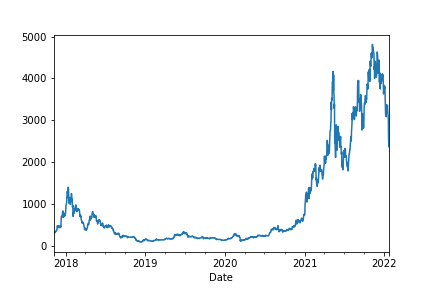

In [526]:
# Plot adjusted close price data
%matplotlib widget
data['Close'].plot()
plt.show()

In [527]:
file_path = f'datasets/stock_{ticker}.csv'
data.to_csv(file_path)

# Load the Stock data

In [528]:
data = pd.read_csv(file_path,index_col='Date')
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [529]:
close_price = data[['Close']]
close_price.head(n).append(close_price.tail(n))

,Close
Date,
2017-11-09,320.884003
2017-11-10,299.252991
2017-11-11,314.681000
2022-01-20,3001.120117
2022-01-21,2557.931641
2022-01-22,2365.637695


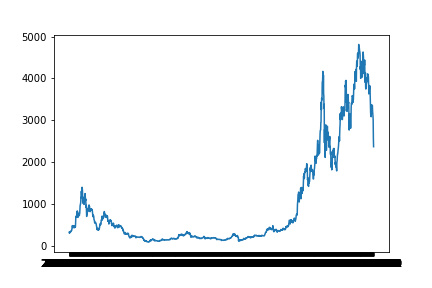

In [530]:
%matplotlib widget
# plt.figure(figsize=(15,5))
plt.plot(close_price);

# NN's are sensitive to scale of the data. So we apply Data Scaling

In [531]:
# scaler = MinMaxScaler(feature_range=(0,1))
scaler = StandardScaler()
df1 = scaler.fit_transform(close_price)
print(df1.shape)
print(type(df1))

(1536, 1)
<class 'numpy.ndarray'>


In [532]:
df1 = pd.DataFrame(df1, index=close_price.index)
df1.head(2).append(df1.tail(2))

,0
Date,
2017-11-09,-0.528881
2017-11-10,-0.546873
2022-01-21,1.331753
2022-01-22,1.171815


# Data Preparation - Shifts

In [547]:
shifts_count = 75
    
df2 = df1.copy()
for i in range(1, shifts_count+1):
    df2["shift_"+str(i)] = df2[0].shift(i)
df2.head()

,0,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,...,shift_66,shift_67,shift_68,shift_69,shift_70,shift_71,shift_72,shift_73,shift_74,shift_75
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-09,-0.528881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-10,-0.546873,-0.528881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-11,-0.534041,-0.546873,-0.528881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-12,-0.539674,-0.534041,-0.546873,-0.528881,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-13,-0.532348,-0.539674,-0.534041,-0.546873,-0.528881,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [548]:
print(df1.shape)
df2.dropna(inplace=True)
print(df2.shape)
df2.head(3).append(df2.tail(3))

(1536, 1)
(1461, 76)


,0,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,...,shift_66,shift_67,shift_68,shift_69,shift_70,shift_71,shift_72,shift_73,shift_74,shift_75
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-23,0.024510,0.038676,0.077202,0.165008,0.068485,0.066140,0.047816,0.080620,0.278765,0.341020,...,-0.506651,-0.519308,-0.520531,-0.518507,-0.514952,-0.532348,-0.539674,-0.534041,-0.546873,-0.528881
2018-01-24,0.084854,0.024510,0.038676,0.077202,0.165008,0.068485,0.066140,0.047816,0.080620,0.278765,...,-0.501017,-0.506651,-0.519308,-0.520531,-0.518507,-0.514952,-0.532348,-0.539674,-0.534041,-0.546873
2018-01-25,0.082566,0.084854,0.024510,0.038676,0.077202,0.165008,0.068485,0.066140,0.047816,0.080620,...,-0.490750,-0.501017,-0.506651,-0.519308,-0.520531,-0.518507,-0.514952,-0.532348,-0.539674,-0.534041
2022-01-20,1.700369,1.779140,1.835863,1.876019,1.991312,1.974352,1.957277,1.905948,2.009058,1.897484,...,2.994871,3.052140,3.073018,3.086038,3.138662,3.060304,3.142558,3.206617,3.047312,2.964992
2022-01-21,1.331753,1.700369,1.779140,1.835863,1.876019,1.991312,1.974352,1.957277,1.905948,2.009058,...,2.711133,2.994871,3.052140,3.073018,3.086038,3.138662,3.060304,3.142558,3.206617,3.047312
2022-01-22,1.171815,1.331753,1.700369,1.779140,1.835863,1.876019,1.991312,1.974352,1.957277,1.905948,...,2.770377,2.711133,2.994871,3.052140,3.073018,3.086038,3.138662,3.060304,3.142558,3.206617


## Data Split

In [549]:
# Testing Data is from Oct 2021 till 21st Jan 2022 (till date)
split_date = "2021-12-01"

In [550]:
train_data = df2[:split_date]
test_data = df2[split_date:]
train_data.shape, test_data.shape

((1409, 76), (53, 76))

In [551]:
train_data.head(2).append(train_data.tail(2))

,0,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,...,shift_66,shift_67,shift_68,shift_69,shift_70,shift_71,shift_72,shift_73,shift_74,shift_75
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-23,0.024510,0.038676,0.077202,0.165008,0.068485,0.066140,0.047816,0.080620,0.278765,0.341020,...,-0.506651,-0.519308,-0.520531,-0.518507,-0.514952,-0.532348,-0.539674,-0.534041,-0.546873,-0.528881
2018-01-24,0.084854,0.024510,0.038676,0.077202,0.165008,0.068485,0.066140,0.047816,0.080620,0.278765,...,-0.501017,-0.506651,-0.519308,-0.520531,-0.518507,-0.514952,-0.532348,-0.539674,-0.534041,-0.546873
2021-11-30,3.056399,2.901384,2.776082,2.611780,2.556882,2.759688,2.730776,2.814600,2.604748,2.755521,...,1.637528,1.642604,1.828792,1.764203,1.503506,1.665331,1.973452,2.058763,2.030917,2.174605
2021-12-01,3.019396,3.056399,2.901384,2.776082,2.611780,2.556882,2.759688,2.730776,2.814600,2.604748,...,1.751226,1.637528,1.642604,1.828792,1.764203,1.503506,1.665331,1.973452,2.058763,2.030917


In [552]:
print(np.array(train_data).shape)
print(np.array(test_data).shape)

(1409, 76)
(53, 76)


In [553]:
# Data Prep
X_train, y_train = train_data.drop(columns=[0]), train_data[0]
X_test, y_test = test_data.drop(columns=[0]), test_data[0]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1409, 75) (1409,) (53, 75) (53,)


In [554]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1409, 75) (1409,) (53, 75) (53,)


In [555]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
print(X_train.shape, X_test.shape)

(1409, 75, 1) (53, 75, 1)


In [570]:
print("Selected Ticker: ",ticker)
print("TimeShifts Considered: ", shifts_count)
print("TimeShifts Considered: ", split_date)
print("Data Shape: ", X_train.shape)
print("Data Shape: ", X_test.shape)

Selected Ticker:  ETH-USD
TimeShifts Considered:  75
TimeShifts Considered:  2021-12-01
Data Shape:  (1409, 75, 1)
Data Shape:  (53, 75, 1)


In [571]:
# Create a LSTM Model
model = Sequential()
# model.add(LSTM(16, input_shape=(X_train.shape[1],1), ))
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
# model.add(LSTM(16, return_sequences=True))
# model.add(Dropout(0.2))
model.add(LSTM(16))
# model.add(LSTM(64))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_68 (LSTM)              (None, 75, 50)            10400     
                                                                 
 lstm_69 (LSTM)              (None, 16)                4288      
                                                                 
 dense_50 (Dense)            (None, 32)                544       
                                                                 
 dropout_16 (Dropout)        (None, 32)                0         
                                                                 
 dense_51 (Dense)            (None, 8)                 264       
                                                                 
 dense_52 (Dense)            (None, 1)                 9         
                                                                 
Total params: 15,505
Trainable params: 15,505
Non-tra

In [575]:
# # Load the TensorBoard notebook extension
%load_ext tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 3364), started 1:14:57 ago. (Use '!kill 3364' to kill it.)

In [574]:
import shutil
try:
    shutil.rmtree('logs')
except FileNotFoundError:
    pass

In [576]:
# my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=7),]
my_callbacks = []

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
my_callbacks = [tensorboard_callback]


history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=10, verbose=1,callbacks=my_callbacks)

Epoch 1/50
141/141 [==============================] - 12s 54ms/step - loss: 0.6866 - val_loss: 2.8075
Epoch 2/50
141/141 [==============================] - ETA: 0s - loss: 0.250 - 6s 44ms/step - loss: 0.2509 - val_loss: 0.9365
Epoch 3/50
141/141 [==============================] - 6s 44ms/step - loss: 0.1500 - val_loss: 0.5979
Epoch 4/50
141/141 [==============================] - 6s 45ms/step - loss: 0.1408 - val_loss: 0.4346
Epoch 5/50
141/141 [==============================] - 6s 44ms/step - loss: 0.1378 - val_loss: 0.3725
Epoch 6/50
141/141 [==============================] - 6s 44ms/step - loss: 0.1317 - val_loss: 0.3589
Epoch 7/50
141/141 [==============================] - 6s 43ms/step - loss: 0.1234 - val_loss: 0.3604
Epoch 8/50
141/141 [==============================] - 6s 44ms/step - loss: 0.1264 - val_loss: 0.3080
Epoch 9/50
141/141 [==============================] - 6s 42ms/step - loss: 0.1264 - val_loss: 0.3093
Epoch 10/50
141/141 [==============================] - 6s 44ms/ste

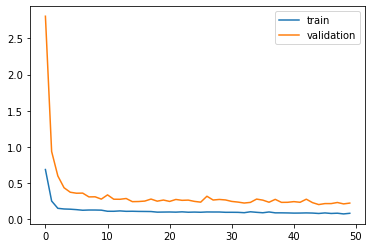

In [577]:
%matplotlib inline
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show();

# Predictions

In [578]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_preds = scaler.inverse_transform(train_preds)
test_preds = scaler.inverse_transform(test_preds)

print(train_preds.shape, test_preds.shape)

print("Training: ",math.sqrt(mean_squared_error(y_train, train_preds)))
print("Testing: ",math.sqrt(mean_squared_error(y_test, test_preds)))

print("Training: ",mean_absolute_error(y_train, train_preds))
print("Testing: ",mean_absolute_error(y_test, test_preds))

(1409, 1) (53, 1)
Training:  1359.7444941301794
Testing:  3921.108892881605
Training:  889.8350629473215
Testing:  3920.5536948769723


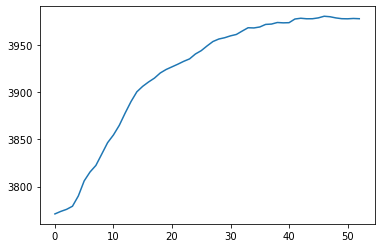

In [579]:
errors = abs(y_test - test_preds.flatten())
%matplotlib inline
plt.plot(errors)
plt.show();

In [580]:
alfa = np.zeros(len(df2))
alfa[:len(train_preds),] = train_preds.reshape(-1)
alfa[len(train_preds):,] = np.nan

beta = np.zeros(len(df2))
beta[:len(train_preds),] = np.nan
beta[len(train_preds)-1:,] = test_preds.reshape(-1)

print(alfa.shape, beta.shape)

(1461,) (1461,)


In [581]:
beta[len(train_preds):,].shape

(52,)

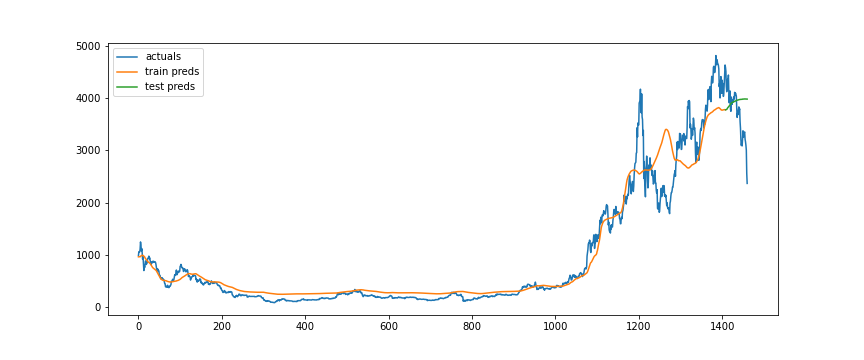

In [582]:
# plot baseline and predictions
%matplotlib widget
plt.figure(figsize=(12,5))
plt.plot(scaler.inverse_transform(np.array(df2[0]).reshape(-1,1)), label='actuals')
plt.plot(alfa,label='train preds')
plt.plot(beta, label='test preds')
plt.legend()
plt.show();

# Predict Next 30 Days

In [519]:
x_input = np.array(df2[0].iloc[-shifts_count:])
temp_x = x_input.tolist()
print(len(temp_x), shifts_count)

predictions = []
future_days = 30

while(future_days > 0):
    if len(temp_x) > shifts_count:
        x_input = np.array(temp_x[-shifts_count:])
        x_input = x_input.reshape((1, shifts_count,1))
        y_hat = model.predict(x_input)
    else:
        x_input = x_input.reshape((1, shifts_count,1))
        y_hat = model.predict(x_input)
        
    temp_x.extend(y_hat[0].tolist())
    predictions.extend(y_hat[0])
    future_days -= 1
    
print(len(predictions))

10 10
30


In [520]:
scaler.inverse_transform(np.array(predictions).reshape(-1,1))[:,0]

array([57.972008, 60.01393 , 63.33426 , 67.17029 , 70.07473 , 72.50316 ,
       73.7942  , 74.18542 , 72.777145, 67.53919 , 57.557014, 60.25768 ,
       63.13652 , 65.43433 , 66.843956, 67.38681 , 66.84178 , 65.12469 ,
       62.382442, 59.69814 , 58.73687 , 60.918816, 62.59148 , 63.47857 ,
       63.53899 , 62.806503, 61.469566, 59.95897 , 58.87676 , 58.70104 ],
      dtype=float32)

In [521]:
# print(list(range(0,len(df2)))[-1])
# print(list(range(len(df2),len(df2)+future_days))[0])
# print(list(range(len(df2),len(df2)+future_days))[-1])
list(range(len(df2),len(df2)+future_days))
len(df2), len(df2)+future_days

(296, 296)

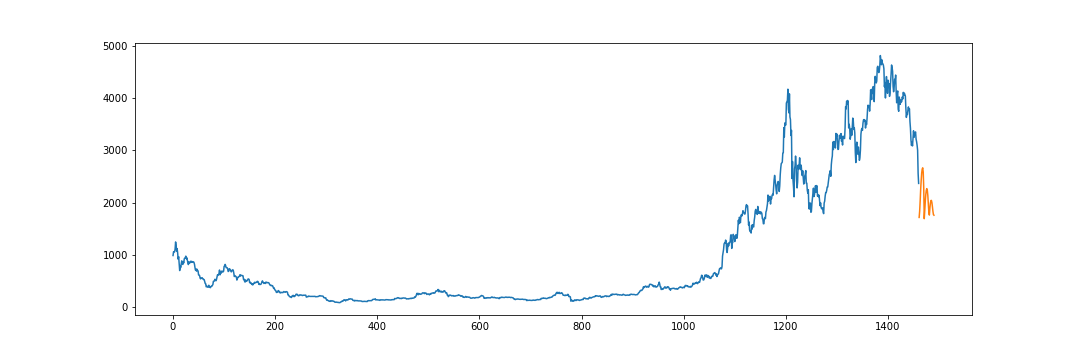

In [583]:
%matplotlib widget
future_days = 30
plt.figure(figsize=(15,5))
plt.plot(range(0,len(df2)), scaler.inverse_transform(np.array(df2[0]).reshape(-1,1)))
plt.plot(range(len(df2),len(df2)+future_days), scaler.inverse_transform(np.array(predictions).reshape(-1,1)))
plt.show();

### References

1. [How to get Stock Market Data in Python?](https://blog.quantinsti.com/stock-market-data-analysis-python/)
2. [How to get INDIAN stock prices with Python?](https://www.youtube.com/watch?v=HmgmhOpS42A)